In [2]:
import pandas as pd
import numpy as np
import scipy

prec = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/prec_1991_2015.xls')
temp = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/temp_1991_2015.xls')
occur = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/aegypti_albopictus.xlsx')

In [3]:
# Table of occurrences
occur.head()
occur_aux = occur.copy()

In [4]:
# Table of temperature
temp.head()

,tas,Year,Month,Country,ISO3,ISO2
0,25.3234,1991,1,MDG,NaN,NaN
1,24.8328,1991,2,MDG,NaN,NaN
2,24.6455,1991,3,MDG,NaN,NaN
3,23.4024,1991,4,MDG,NaN,NaN
4,21.7749,1991,5,MDG,NaN,NaN


In [5]:
# Table of precipitation
prec.head()

,pr,Year,Month,Country,ISO3,ISO2
0,127.9060,1991,1,LBN,NaN,NaN
1,67.7115,1991,2,LBN,NaN,NaN
2,140.4620,1991,3,LBN,NaN,NaN
3,47.5851,1991,4,LBN,NaN,NaN
4,15.3227,1991,5,LBN,NaN,NaN


In [6]:
# Rename the columns to match among themselves
temp.rename(columns={'\tYear':'Year', ' Month':'Month', ' Country':'Country'}, inplace=True)
prec.rename(columns={'\tYear':'Year', ' Month':'Month', ' Country':'Country'}, inplace=True)
occur.rename(columns={'YEAR':'Year', 'COUNTRY_ID':'Country'}, inplace=True)

In [7]:
# Add Taywan to dataset because the original source of temperatures and rainfall 
# doesn't contain this country. Taywan has several occurrences, so it was crutial
# to look for its data. 
taywan_temp = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/TWN_data.xlsx', sheet_name='Temp')
taywan_rain = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/TWN_data.xlsx', sheet_name='Rainfall')
taywan= pd.merge(taywan_temp, taywan_rain, how='left', left_on=['Country','Year'], right_on = ['Country','Year'])
taywan.rename(columns={'temp':'tas'}, inplace=True)
taywan = taywan.loc[(taywan['Year']>=1991) & (taywan['Year']<=2015)].reset_index(drop=True)
taywan

,tas,Year,Country,pr
0,22.1,1991,TWN,2032.2
1,22.0,1992,TWN,2199.9
2,21.7,1993,TWN,1671.9
3,22.0,1994,TWN,2432.7
4,21.7,1995,TWN,1639.1
5,22.1,1996,TWN,2608.1
6,21.6,1997,TWN,2117.9
7,22.2,1998,TWN,2103.1
8,22.2,1999,TWN,2658.3
9,21.5,2000,TWN,2417.4


In [8]:
# Create a file with the merged data of Taywan
taywan.to_csv('taywan.csv')

In [9]:
# Read the Taywan table
taywan = pd.read_csv('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/taywan.csv')
taywan.drop(columns=['Unnamed: 0'],inplace=True)
taywan.shape

(25, 4)

## Preprocessing of Occurrences of mosquitoes Aedes

In [10]:
# Drop unnecessary columns for the analyzes
occur.drop(columns=['SOURCE_TYPE','LOCATION_TYPE','POLYGON_ADMIN','STATUS','GAUL_AD0','X','Y'],inplace=True)
occur.head()

,VECTOR,OCCURRENCE_ID,Year,COUNTRY,Country
0,Aedes aegypti,1,1958,Kenya,KEN
1,Aedes aegypti,2,1960,Congo,COG
2,Aedes aegypti,3,1960,Congo,COG
3,Aedes aegypti,4,1960,Kenya,KEN
4,Aedes aegypti,5,1960,Kenya,KEN


In [11]:
# Change the year type from string to int
occur['Year'] = pd.to_numeric(occur['Year'], downcast='integer',errors='coerce')
occur.describe()

,OCCURRENCE_ID,Year
count,42066.000000,40804.000000
mean,21033.500000,2006.723630
std,12143.552549,7.616601
min,1.000000,1958.000000
25%,10517.250000,2004.000000
50%,21033.500000,2008.000000
75%,31549.750000,2013.000000
max,42066.000000,2014.000000


In [12]:
# Select the timeframe of temperature and rainfall we colected 
occur = occur.loc[(occur['Year']>=1991) & (occur['Year']<=2015)]

# Set as NaN the countries we didn't find the temperature nor the rainfall
occur['Country'] = occur['Country'].replace('XXX', np.nan)
occur['Country'] = occur['Country'].replace('HKG', np.nan)

occur['Year'] = occur['Year'].astype(int)
occur.describe()

,OCCURRENCE_ID,Year
count,39172.000000,39172.000000
mean,21502.137113,2007.862734
std,11715.914535,4.979114
min,1069.000000,1991.000000
25%,11778.750000,2005.000000
50%,21571.500000,2008.000000
75%,31608.250000,2013.000000
max,42042.000000,2014.000000


In [13]:
# Aggregate the occurrences by country in an annual basis
annualOccur = pd.DataFrame(occur.groupby(['Year','Country'])['OCCURRENCE_ID'].count()).reset_index()
annualOccur.head()

,Year,Country,OCCURRENCE_ID
0,1991,AUS,31
1,1991,BRA,2
2,1991,COL,1
3,1991,FJI,4
4,1991,GUF,1


## Preprocessing of Temperature and Rainfall

In [14]:
# Aggregate the occurrences by country in an annual basis without Taywan
annualTemp = pd.DataFrame(temp.groupby(['Year','Country'])['tas'].sum()/12).reset_index()
annualPrec = pd.DataFrame(prec.groupby(['Year','Country'])['pr'].sum()/12).reset_index()
temp_rain=pd.merge(annualTemp,annualPrec,
                   how='inner',
                   left_on = ['Year','Country'],
                   right_on = ['Year','Country'])
temp_rain.describe()

,Year,tas,pr
count,3650.000000,3650.000000,3650.000000
mean,2003.000000,23.490532,137.480884
std,7.212091,14.660920,89.987102
min,1991.000000,-7.018926,4.440862
25%,1997.000000,19.656523,75.091654
50%,2003.000000,24.988167,124.989354
75%,2009.000000,26.483633,185.351331
max,2015.000000,187.946183,801.706467


## Merge of Temperature and Rainfall (Main Table)

In [15]:
# Add Taywan to the dataframe
temp_rain = pd.concat([temp_rain, taywan])

# Different abbreviation of the same country in different datasets
temp_rain['Country'] = temp_rain['Country'].replace('ROM', 'ROU')
temp_rain

/Users/RodolfoSaldanha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


,Country,Year,pr,tas
0,ABW,1991,38.882968,28.078008
1,AFG,1991,36.931453,13.118033
2,AGO,1991,83.844948,21.652200
3,AIA,1991,113.631158,26.108292
4,ALB,1991,77.587033,11.038935
5,ARG,1991,52.792958,14.416431
6,ASM,1991,263.307917,26.879967
7,ATG,1991,183.339717,26.413642
8,AUS,1991,37.912953,22.172075
9,AUT,1991,94.343317,6.151395


## Merge Occurrences to the Main Table

In [16]:
temp_rain_occur=pd.merge(temp_rain,annualOccur,
                   how='left',
                   left_on = ['Year','Country'],
                   right_on = ['Year','Country'])
temp_rain_occur.rename(columns={'OCCURRENCE_ID':'Occurrences', 'tas':'Temperature', 'pr':'Precipitation'}, inplace=True)
temp_rain_occur.shape

(3675, 5)

In [17]:
temp_rain_occur.describe()

,Year,Precipitation,Temperature,Occurrences
count,3675.000000,3675.000000,3675.000000,632.000000
mean,2003.000000,150.946483,23.479929,61.971519
std,7.212084,187.992485,14.611533,430.992062
min,1991.000000,4.440862,-7.018926,1.000000
25%,1997.000000,75.340175,19.721479,1.000000
50%,2003.000000,125.000000,24.962717,4.000000
75%,2009.000000,186.939941,26.450129,12.000000
max,2015.000000,2744.000000,187.946183,5527.000000


In [18]:
# Fill the the year in which no occurrences happened in the countries
temp_rain_occur.fillna(0,inplace=True)
temp_rain_occur.head()

,Country,Year,Precipitation,Temperature,Occurrences
0,ABW,1991,38.882968,28.078008,0.0
1,AFG,1991,36.931453,13.118033,0.0
2,AGO,1991,83.844948,21.652200,0.0
3,AIA,1991,113.631158,26.108292,0.0
4,ALB,1991,77.587033,11.038935,0.0


In [19]:
# File containing temperature, rainfall and occurrences
temp_rain_occur.to_csv('occurrences.csv', encoding='utf-8', index=False)

## Preprocessing of Urbanization

In [20]:
# Dataset about urban and rural population percentage
urb = pd.read_csv('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/urban.csv')
urb.rename(columns={'Code':'Country'}, inplace=True)
urb.describe()

,Year,Urban (%),Rural (%)
count,27977.000000,27977.000000,27977.000000
mean,1996.039139,53.575697,46.424303
std,46.798435,26.745724,26.745724
min,1500.000000,0.000000,0.000000
25%,1974.000000,31.712000,24.386000
50%,1999.000000,53.767149,46.232853
75%,2025.000000,75.614000,68.288002
max,2050.000000,100.000000,100.000000


In [21]:
# Check for countries of the main Dataframe that aren't in the urbanization dataset
countryList = urb['Country'].unique()
temp_rain_occur[~temp_rain_occur['Country'].isin(countryList)]

,Country,Year,Precipitation,Temperature,Occurrences
144,ZAR,1991,122.501517,24.110358,0.0
290,ZAR,1992,117.536158,24.069758,0.0
436,ZAR,1993,117.356483,23.846467,0.0
582,ZAR,1994,113.701350,24.098975,0.0
728,ZAR,1995,119.591717,24.466525,0.0
874,ZAR,1996,109.121400,24.239275,0.0
1020,ZAR,1997,127.673542,24.643383,0.0
1166,ZAR,1998,117.678642,24.657525,0.0
1312,ZAR,1999,125.678100,24.023367,0.0
1458,ZAR,2000,121.259100,24.291200,0.0


In [22]:
# Fix the difference of abbreviations for Rep. Dem. Congo
temp_rain_occur['Country']  = temp_rain_occur['Country'].replace('ZAR', 'COD')
temp_rain_occur[~temp_rain_occur['Country'].isin(countryList)]

,Country,Year,Precipitation,Temperature,Occurrences


## Merge urbanization to the Main Table

In [23]:
urban= pd.merge(temp_rain_occur, urb,  how='left', left_on=['Country','Year'], right_on = ['Country','Year'])
urban.describe()

,Year,Precipitation,Temperature,Occurrences,Urban (%),Rural (%)
count,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000
mean,2003.000000,150.946483,23.479929,10.657415,54.954128,45.045872
std,7.212084,187.992485,14.611533,180.138338,25.069653,25.069653
min,1991.000000,4.440862,-7.018926,0.000000,0.000000,0.000000
25%,1997.000000,75.340175,19.721479,0.000000,33.974000,24.218001
50%,2003.000000,125.000000,24.962717,0.000000,53.530000,46.470001
75%,2009.000000,186.939941,26.450129,0.000000,75.782000,66.025997
max,2015.000000,2744.000000,187.946183,5527.000000,100.000000,100.000000


## Normalization of the Country Code list

In [24]:
# Dataset of country names with country codes
countryCodes = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/CountryCodes.xlsx')
countryCodes = countryCodes.rename(columns={'Country ':'Country'})
countryCodes

,Country,Code
0,AFRICA,
1,Eastern Africa,
2,Burundi,BDI
3,Comoros,COM
4,Djibouti,DJI
5,Eritrea,ERI
6,Ethiopia,ETH
7,Kenya,KEN
8,Madagascar,MDG
9,Malawi,MWI


In [25]:
# Some country names diverge in different DataFrame and, therefore, the code of the country wasn't added.
# In order to fix it, the codes were manually concatened to the former list codes
d = {'Country': ['United States',
                 "CÙte d'Ivoire",
                 "Congo (Democratic Republic of the)",
                 "Korea (Republic of)",
                 "Tanzania (United Republic of)"],
     'Code': ['USA', 'CIV', 'COD', 'KOR', 'TZA']}
wrongCode = pd.DataFrame(data=d)

aux = [countryCodes, wrongCode]

countryCodes = pd.concat(aux)
countryCodes

,Country,Code
0,AFRICA,
1,Eastern Africa,
2,Burundi,BDI
3,Comoros,COM
4,Djibouti,DJI
5,Eritrea,ERI
6,Ethiopia,ETH
7,Kenya,KEN
8,Madagascar,MDG
9,Malawi,MWI


## Preprocessing of the HDI

In [26]:
# Dataset of the HDI
hdi = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/HDI.xlsx')
hdi['Country'] = hdi['Country'].str.strip()

In [27]:
hdi=pd.merge(hdi,countryCodes,
                   how='left',
                   left_on = ['Country'],
                   right_on = ['Country'])

# Even though some country names diverge and, moreover, the code of the country wasn't added,
# these contries don't belong to main DataFrame. Therefore, they're not relevant
hdi.loc[hdi['Code'].isnull()]

,HDI Rank (2017),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Code
56,144,Eswatini (Kingdom of),0.536,0.537,0.536,0.531,0.524,0.520,0.513,0.504,...,0.527,0.538,0.550,0.561,0.572,0.580,0.584,0.586,0.588,NaN
74,7,"Hong Kong, China (SAR)",0.781,0.786,0.791,0.799,0.804,0.808,0.811,0.816,...,0.898,0.901,0.904,0.911,0.915,0.923,0.927,0.930,0.933,NaN
112,131,Micronesia (Federated States of),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.603,0.608,0.613,0.616,0.619,0.618,0.627,0.627,0.627,NaN
113,112,Moldova (Republic of),0.651,0.640,0.620,0.618,0.595,0.594,0.591,0.593,...,0.662,0.670,0.677,0.684,0.693,0.696,0.693,0.697,0.700,NaN
130,119,"Palestine, State of",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.670,0.672,0.677,0.687,0.679,0.679,0.687,0.689,0.686,NaN
168,80,The former Yugoslav Republic of Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.731,0.735,0.738,0.740,0.743,0.747,0.754,0.756,0.757,NaN


In [28]:
# Drop useless columns
hdi.drop(columns=['HDI Rank (2017)','Country'],inplace=True)
hdi.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Code
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498,AFG
1,0.645,0.626,0.610,0.613,0.619,0.632,0.641,0.641,0.652,0.662,...,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785,ALB
2,0.577,0.581,0.587,0.591,0.595,0.600,0.608,0.617,0.627,0.636,...,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.753,0.754,DZA
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858,AND
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.374,...,0.522,0.520,0.535,0.543,0.554,0.564,0.572,0.577,0.581,AGO


In [29]:
hdi.columns

Index([  1990,   1991,   1992,   1993,   1994,   1995,   1996,   1997,   1998,
         1999,   2000,   2001,   2002,   2003,   2004,   2005,   2006,   2007,
         2008,   2009,   2010,   2011,   2012,   2013,   2014,   2015,   2016,
         2017, 'Code'],
      dtype='object')

In [30]:
hdi.columns = hdi.columns.astype(str)
hdi.columns

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', 'Code'],
      dtype='object')

In [69]:
# Adjust HDI to the format the main table it is set
values = hdi.loc[:, '1990':'2017']
hdiAdj = pd.melt(hdi, id_vars=['Code'], value_vars=values)
hdiAdj.head()

,Code,variable,value
0,AFG,1990,NaN
1,ALB,1990,0.645
2,DZA,1990,0.577
3,AND,1990,NaN
4,AGO,1990,NaN


In [51]:
hdiAdj.describe()

,value
count,4757.000000
mean,0.655067
std,0.165734
min,0.199000
25%,0.529000
50%,0.680000
75%,0.783000
max,0.953000


In [52]:
hdiAdj.dtypes

Code         object
variable     object
value       float64
dtype: object

In [70]:
# Rename to the format of the other tables
hdiAdj.rename(columns={'Code':'Country', 'variable':'Year', 'value':'HDI'}, inplace=True)
hdiAdj['Year'] = hdiAdj['Year'].astype(float)

In [86]:
# Add Taywan HDI, which was found in a different source
hdiTay = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/HDI_TWN.xlsx')
hdiTay.head()

,Year,Unnamed: 1,HDI
0,1991,NaN,0.837
1,1992,NaN,0.837
2,1993,NaN,0.843
3,1994,NaN,0.849
4,1995,NaN,0.854


In [87]:
hdiTay.rename(columns={'Unnamed: 1':'Country'}, inplace=True)
hdiTay['Country'].replace(np.nan,'TWN', inplace=True)
hdiTay.head()

,Year,Country,HDI
0,1991,TWN,0.837
1,1992,TWN,0.837
2,1993,TWN,0.843
3,1994,TWN,0.849
4,1995,TWN,0.854


In [73]:
hdiAdj = pd.concat([hdiAdj, hdiTay])
hdiAdj.reset_index(drop=True)

/Users/RodolfoSaldanha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,Country,HDI,Year
0,AFG,NaN,1990.0
1,ALB,0.645,1990.0
2,DZA,0.577,1990.0
3,AND,NaN,1990.0
4,AGO,NaN,1990.0
5,ATG,NaN,1990.0
6,ARG,0.704,1990.0
7,ARM,0.631,1990.0
8,AUS,0.866,1990.0
9,AUT,0.795,1990.0


In [75]:
# Select the timeframe of the main table
hdiAdj = hdiAdj.loc[(hdiAdj['Year']>=1991) & (hdiAdj['Year']<=2015)]
hdiAdj['Country'].isnull().sum()

150

## Merge HDI to the Main Table

In [76]:
# Check for countries of the main Dataframe that aren't in the HDI dataset
countryList = hdiAdj['Country'].unique()
urban['Country'].loc[~urban['Country'].isin(countryList)].unique()

array(['ABW', 'AIA', 'ASM', 'BMU', 'COK', 'CYM', 'GLP', 'GUF', 'GUM',
       'MAC', 'MNP', 'MSR', 'MTQ', 'MYT', 'NCL', 'NIU', 'NRU', 'PRI',
       'PYF', 'REU', 'SOM', 'TKL', 'TUV', 'VGB', 'WLF'], dtype=object)

In [85]:
data= pd.merge(urban, hdiAdj,  how='left', left_on=['Country','Year'], right_on = ['Country','Year'])
data['HDI'] = data['HDI'].astype('float')
data.describe()

,Year,Precipitation,Temperature,Occurrences,Urban (%),Rural (%),HDI
count,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,2751.000000
mean,2003.000000,150.946483,23.479929,10.657415,54.954128,45.045872,0.647353
std,7.212084,187.992485,14.611533,180.138338,25.069653,25.069653,0.163723
min,1991.000000,4.440862,-7.018926,0.000000,0.000000,0.000000,0.208000
25%,1997.000000,75.340175,19.721479,0.000000,33.974000,24.218001,0.508500
50%,2003.000000,125.000000,24.962717,0.000000,53.530000,46.470001,0.674000
75%,2009.000000,186.939941,26.450129,0.000000,75.782000,66.025997,0.771000
max,2015.000000,2744.000000,187.946183,5527.000000,100.000000,100.000000,0.942000


## Preprocessing of the Population

In [88]:
pop = pd.read_csv('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/Population.csv')
#hdi['Country'] = hdi['Country'].str.strip()

In [89]:
pop.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.118
1,4,Afghanistan,2,Medium,1951,1951.5,4134.477,3705.031,7839.510
2,4,Afghanistan,2,Medium,1952,1952.5,4173.993,3760.979,7934.980
3,4,Afghanistan,2,Medium,1953,1953.5,4217.860,3820.747,8038.596
4,4,Afghanistan,2,Medium,1954,1954.5,4266.104,3884.348,8150.447


In [90]:
# Drop unnecessary columns and rename for the analyzes
pop.drop(columns=['VarID','LocID','Variant','MidPeriod','PopMale','PopFemale'],inplace=True)
pop.rename(columns={'Time':'Year', 'Location':'Country'}, inplace=True)
pop.head()

,Country,Year,PopTotal
0,Afghanistan,1950,7752.118
1,Afghanistan,1951,7839.510
2,Afghanistan,1952,7934.980
3,Afghanistan,1953,8038.596
4,Afghanistan,1954,8150.447


In [91]:
pop=pd.merge(pop,countryCodes,
                   how='left',
                   left_on = ['Country'],
                   right_on = ['Country'])

# Even though some country names diverge and, moreover, the code of the country wasn't added,
# these contries don't belong to main DataFrame. Therefore, they're not relevant
pop['Country'].loc[pop['Code'].isnull()].unique()

array(['Africa', 'Asia', 'Europe', 'High-income countries',
       'Latin America and the Caribbean', 'Least developed countries',
       'Less developed regions',
       'Less developed regions, excluding China',
       'Less developed regions, excluding least developed countries',
       'Low-income countries', 'Lower-middle-income countries',
       'Middle-income countries', 'More developed regions',
       'Northern America', 'Oceania', 'Sub-Saharan Africa',
       'Upper-middle-income countries', 'World'], dtype=object)

In [92]:
pop.head()

,Country,Year,PopTotal,Code
0,Afghanistan,1950,7752.118,AFG
1,Afghanistan,1951,7839.510,AFG
2,Afghanistan,1952,7934.980,AFG
3,Afghanistan,1953,8038.596,AFG
4,Afghanistan,1954,8150.447,AFG


In [93]:
# Rename to the format of the other tables
pop.drop(columns=['Country'],inplace=True)
pop.rename(columns={'Code':'Country'}, inplace=True)

In [94]:
# Select the timeframe of the main table
pop = pop.loc[(pop['Year']>=1991) & (pop['Year']<=2015)]
pop.head()

,Year,PopTotal,Country
41,1991,12993.657,AFG
42,1992,13981.231,AFG
43,1993,15095.099,AFG
44,1994,16172.719,AFG
45,1995,17099.541,AFG


In [95]:
pop.describe()

,Year,PopTotal
count,61425.000000,6.142500e+04
mean,2003.000000,1.985224e+05
std,7.211161,7.663329e+05
min,1991.000000,7.740000e-01
25%,1997.000000,5.288480e+02
50%,2003.000000,6.468827e+03
75%,2009.000000,3.468743e+04
max,2015.000000,7.383009e+06


In [96]:
# Drop duplicated lines
pop=pop.drop_duplicates()
pop.describe()

,Year,PopTotal
count,6825.000000,6.825000e+03
mean,2003.000000,1.985224e+05
std,7.211631,7.663828e+05
min,1991.000000,7.740000e-01
25%,1997.000000,5.288480e+02
50%,2003.000000,6.468827e+03
75%,2009.000000,3.468743e+04
max,2015.000000,7.383009e+06


## Merge Population to the Main Table

In [97]:
data= pd.merge(data, pop,  how='left', left_on=['Country','Year'], right_on = ['Country','Year'])
data.describe()

,Year,Precipitation,Temperature,Occurrences,Urban (%),Rural (%),HDI,PopTotal
count,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,2751.000000,3.675000e+03
mean,2003.000000,150.946483,23.479929,10.657415,54.954128,45.045872,0.647353,3.813460e+04
std,7.212084,187.992485,14.611533,180.138338,25.069653,25.069653,0.163723,1.445042e+05
min,1991.000000,4.440862,-7.018926,0.000000,0.000000,0.000000,0.208000,1.126000e+00
25%,1997.000000,75.340175,19.721479,0.000000,33.974000,24.218001,0.508500,3.869210e+02
50%,2003.000000,125.000000,24.962717,0.000000,53.530000,46.470001,0.674000,5.417070e+03
75%,2009.000000,186.939941,26.450129,0.000000,75.782000,66.025997,0.771000,2.273127e+04
max,2015.000000,2744.000000,187.946183,5527.000000,100.000000,100.000000,0.942000,1.397029e+06


## Preprocessing of the Education

In [98]:
# Dataset of the Education
education = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/education.xlsx')
education['Country'] = education['Country'].str.strip()
education

,HDI Rank (2017),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,168,Afghanistan,0.122,0.133,0.145,0.156,0.168,0.179,0.190,0.202,...,0.347,0.359,0.371,0.382,0.390,0.398,0.406,0.410,0.410,0.415
1,68,Albania,0.584,0.589,0.558,0.543,0.542,0.551,0.558,0.571,...,0.646,0.652,0.673,0.693,0.730,0.732,0.733,0.733,0.742,0.745
2,85,Algeria,0.385,0.395,0.405,0.414,0.424,0.431,0.443,0.458,...,0.588,0.608,0.626,0.644,0.652,0.660,0.661,0.662,0.663,0.664
3,35,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.661,0.661,0.662,0.663,0.715,0.715,0.716,0.715,0.714,0.714
4,147,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.390,0.404,0.398,0.423,0.435,0.447,0.460,0.472,0.487,0.498
5,70,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.674,0.672,0.667,0.659,0.663,0.669,0.669,0.676,0.676,0.676
6,47,Argentina,0.628,0.632,0.634,0.636,0.639,0.648,0.659,0.670,...,0.753,0.775,0.802,0.807,0.805,0.804,0.808,0.812,0.814,0.816
7,83,Armenia,0.634,0.637,0.636,0.642,0.636,0.632,0.628,0.641,...,0.712,0.729,0.731,0.732,0.735,0.739,0.742,0.746,0.749,0.749
8,3,Australia,0.873,0.874,0.874,0.875,0.875,0.894,0.895,0.895,...,0.911,0.909,0.913,0.916,0.919,0.921,0.924,0.926,0.929,0.929
9,20,Austria,0.676,0.683,0.692,0.694,0.705,0.709,0.712,0.715,...,0.809,0.819,0.837,0.838,0.841,0.833,0.844,0.847,0.852,0.852


In [99]:
education=pd.merge(education,countryCodes,
                   how='left',
                   left_on = ['Country'],
                   right_on = ['Country'])

# Even though some country names diverge and, moreover, the code of the country wasn't added,
# these contries don't belong to main DataFrame. Therefore, they're not relevant
education.loc[education['Code'].isnull()]

,HDI Rank (2017),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Code
56,144,Eswatini (Kingdom of),0.407,0.412,0.413,0.412,0.410,0.408,0.404,0.401,...,0.491,0.501,0.508,0.515,0.522,0.528,0.528,0.528,0.528,NaN
74,7,"Hong Kong, China (SAR)",0.640,0.645,0.650,0.655,0.660,0.665,0.669,0.673,...,0.807,0.808,0.807,0.824,0.830,0.846,0.852,0.855,0.855,NaN
112,131,Micronesia (Federated States of),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.552,0.564,0.573,0.581,0.590,0.590,0.590,0.592,0.590,NaN
113,112,Moldova (Republic of),0.598,0.597,0.596,0.595,0.594,0.593,0.586,0.590,...,0.697,0.696,0.699,0.709,0.716,0.714,0.709,0.710,0.710,NaN
130,119,"Palestine, State of",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.651,0.655,0.660,0.667,0.654,0.655,0.657,0.660,0.660,NaN
168,80,The former Yugoslav Republic of Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.657,0.662,0.667,0.670,0.673,0.676,0.689,0.691,0.691,NaN


In [100]:
# Drop useless columns
education.drop(columns=['HDI Rank (2017)','Country'],inplace=True)
education.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Code
0,0.122,0.133,0.145,0.156,0.168,0.179,0.190,0.202,0.213,0.224,...,0.359,0.371,0.382,0.390,0.398,0.406,0.410,0.410,0.415,AFG
1,0.584,0.589,0.558,0.543,0.542,0.551,0.558,0.571,0.580,0.586,...,0.652,0.673,0.693,0.730,0.732,0.733,0.733,0.742,0.745,ALB
2,0.385,0.395,0.405,0.414,0.424,0.431,0.443,0.458,0.473,0.487,...,0.608,0.626,0.644,0.652,0.660,0.661,0.662,0.663,0.664,DZA
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.661,0.662,0.663,0.715,0.715,0.716,0.715,0.714,0.714,AND
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276,...,0.404,0.398,0.423,0.435,0.447,0.460,0.472,0.487,0.498,AGO


In [101]:
education.columns

Index([  1990,   1991,   1992,   1993,   1994,   1995,   1996,   1997,   1998,
         1999,   2000,   2001,   2002,   2003,   2004,   2005,   2006,   2007,
         2008,   2009,   2010,   2011,   2012,   2013,   2014,   2015,   2016,
         2017, 'Code'],
      dtype='object')

In [102]:
education.columns = education.columns.astype(str)
education.columns

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', 'Code'],
      dtype='object')

In [103]:
# Adjust education to the format the main table it is set
values = education.loc[:, '1990':'2017']
educationAdj = pd.melt(education, id_vars=['Code'], value_vars=values)
educationAdj.head()

,Code,variable,value
0,AFG,1990,0.122
1,ALB,1990,0.584
2,DZA,1990,0.385
3,AND,1990,NaN
4,AGO,1990,NaN


In [104]:
educationAdj.describe()

,value
count,4773.000000
mean,0.577983
std,0.187790
min,0.081000
25%,0.436000
50%,0.609000
75%,0.714000
max,0.941000


In [105]:
educationAdj.dtypes

Code         object
variable     object
value       float64
dtype: object

In [106]:
# Rename to the format of the other tables
educationAdj.rename(columns={'Code':'Country', 'variable':'Year', 'value':'Education'}, inplace=True)
educationAdj['Year'] = educationAdj['Year'].astype(float)

In [107]:
# Select the timeframe of the main table
educationAdj = educationAdj.loc[(educationAdj['Year']>=1991) & (educationAdj['Year']<=2015)]
educationAdj['Country'].isnull().sum()
# The same amount as in HDI

150

## Merge education to the main table

In [108]:
# Check for countries of the main Dataframe that aren't in the HDI dataset
countryList = educationAdj['Country'].unique()
urban['Country'].loc[~urban['Country'].isin(countryList)].unique()

array(['ABW', 'AIA', 'ASM', 'BMU', 'COK', 'CYM', 'GLP', 'GUF', 'GUM',
       'MAC', 'MNP', 'MSR', 'MTQ', 'MYT', 'NCL', 'NIU', 'NRU', 'PRI',
       'PYF', 'REU', 'SOM', 'TKL', 'TUV', 'VGB', 'WLF', 'TWN'],
      dtype=object)

In [109]:
data= pd.merge(data, educationAdj,  how='left', left_on=['Country','Year'], right_on = ['Country','Year'])
data.describe()

,Year,Precipitation,Temperature,Occurrences,Urban (%),Rural (%),HDI,PopTotal,Education
count,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,2751.000000,3.675000e+03,2738.000000
mean,2003.000000,150.946483,23.479929,10.657415,54.954128,45.045872,0.647353,3.813460e+04,0.563970
std,7.212084,187.992485,14.611533,180.138338,25.069653,25.069653,0.163723,1.445042e+05,0.185258
min,1991.000000,4.440862,-7.018926,0.000000,0.000000,0.000000,0.208000,1.126000e+00,0.125000
25%,1997.000000,75.340175,19.721479,0.000000,33.974000,24.218001,0.508500,3.869210e+02,0.416000
50%,2003.000000,125.000000,24.962717,0.000000,53.530000,46.470001,0.674000,5.417070e+03,0.589000
75%,2009.000000,186.939941,26.450129,0.000000,75.782000,66.025997,0.771000,2.273127e+04,0.702000
max,2015.000000,2744.000000,187.946183,5527.000000,100.000000,100.000000,0.942000,1.397029e+06,0.940000


## Preprocessing Dengue fever occurrences

In [110]:
dengue = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/Dengue.xlsx')
dengue

,LOCATION_TYPE,ADMIN_LEVEL,GAUL_AD0,GAUL_AD1,GAUL_AD2,POINT_ID,UNIQUE_LOCATION,X,Y,YEAR,COUNTRY,REGION
0,polygon,2,240,1761,26423,-999,104144,100.504418,13.748735,1960,Thailand,Asia
1,polygon,2,240,1761,26404,-999,104125,100.481002,13.730408,1960,Thailand,Asia
2,polygon,0,222,-999,-999,-999,3346,103.807965,1.349812,1960,Singapore,Asia
3,point,-999,1011447,1012403,1002835,1219,1219,105.945053,10.371660,1960,Viet Nam,Asia
4,polygon,2,240,1761,26423,-999,104144,100.504418,13.748735,1961,Thailand,Asia
5,polygon,2,240,1761,26404,-999,104125,100.481002,13.730408,1961,Thailand,Asia
6,polygon,2,115,1542,70254,-999,147975,78.998148,12.800638,1962,India,Asia
7,polygon,2,240,1761,26423,-999,104144,100.504418,13.748735,1962,Thailand,Asia
8,polygon,2,240,1761,26404,-999,104125,100.481002,13.730408,1962,Thailand,Asia
9,polygon,2,1011447,1719,1003287,-999,1003287,105.827366,21.036487,1963,Viet Nam,Asia


In [111]:
# Drop unnecessary columns for the analyzes
dengue.drop(columns=['ADMIN_LEVEL','LOCATION_TYPE','GAUL_AD0','GAUL_AD1','GAUL_AD2','POINT_ID',
                     'UNIQUE_LOCATION', 'X', 'Y'],inplace=True)
dengue['COUNTRY'] = dengue['COUNTRY'].str.strip()
dengue.head()

,YEAR,COUNTRY,REGION
0,1960,Thailand,Asia
1,1960,Thailand,Asia
2,1960,Singapore,Asia
3,1960,Viet Nam,Asia
4,1961,Thailand,Asia


In [112]:
dengue.describe()

,YEAR
count,8309.000000
mean,2000.734986
std,9.690631
min,1960.000000
25%,1997.000000
50%,2003.000000
75%,2008.000000
max,2012.000000


In [113]:
# Select the timeframe necessary
dengue = dengue.loc[(dengue['YEAR']>=1991) & (dengue['YEAR']<=2015)]
dengue.describe()

,YEAR
count,7189.000000
mean,2003.839894
std,5.313603
min,1991.000000
25%,2000.000000
50%,2005.000000
75%,2008.000000
max,2012.000000


In [114]:
# Aggregate the occurrences by country in an annual basis
annualDengue = pd.DataFrame(dengue.groupby(['YEAR','COUNTRY']).count()).reset_index()

# Fix the divergency of names between tables
annualDengue['COUNTRY'] = annualDengue['COUNTRY'].replace('Reunion', 'R?union')
annualDengue['COUNTRY'] = annualDengue['COUNTRY'].replace("Cote d'Ivoire", "C?te d'Ivoire")
annualDengue.head()

,YEAR,COUNTRY,REGION
0,1991,Australia,1
1,1991,Brazil,46
2,1991,China,3
3,1991,Djibouti,1
4,1991,French Guiana,3


In [115]:
annualDengue.describe()

,YEAR,REGION
count,885.000000,885.000000
mean,2002.866667,8.115254
std,5.791071,18.262114
min,1991.000000,1.000000
25%,1998.000000,1.000000
50%,2004.000000,3.000000
75%,2008.000000,8.000000
max,2012.000000,313.000000


In [116]:
# Find the country codes for the dengue table
occur_aux = occur_aux[['COUNTRY', 'COUNTRY_ID']].drop_duplicates()
annualDengue=pd.merge(annualDengue,occur_aux,
                   how='left',
                   left_on = ['COUNTRY'],
                   right_on = ['COUNTRY'])
annualDengue.isnull().sum()

YEAR           0
COUNTRY        0
REGION         0
COUNTRY_ID    59
dtype: int64

In [117]:
# Find the divergence of country names, so the ones that are in the main table are fixed
wrongCodes = annualDengue.loc[annualDengue['COUNTRY_ID'].isnull()]
wrongCodes = pd.DataFrame(wrongCodes.groupby(['COUNTRY']).count()).reset_index()
wrongCodes
# These ones found below don't matter for the analyzis 

,COUNTRY,YEAR,REGION,COUNTRY_ID
0,Cape Verde,1,1,0
1,Chad,14,14,0
2,Chile,4,4,0
3,Ecuador,14,14,0
4,Ethiopia,1,1,0
5,Guinea-Bissau,1,1,0
6,Jammu Kashmir,1,1,0
7,Mali,3,3,0
8,Micronesia (Federated States of),6,6,0
9,Netherlands Antilles,3,3,0


In [118]:
annualDengue = annualDengue.loc[~annualDengue['COUNTRY_ID'].isnull()]
annualDengue.drop(columns=['COUNTRY'],inplace=True)
annualDengue.rename(columns={'YEAR':'Year', 'COUNTRY_ID':'Country', 'REGION':'Dengue'}, inplace=True)
annualDengue.head()

,Year,Dengue,Country
0,1991,1,AUS
1,1991,46,BRA
2,1991,3,CHN
3,1991,1,DJI
4,1991,3,GUF


In [119]:
annualDengue.describe()

,Year,Dengue
count,826.000000,826.000000
mean,2002.759080,8.506053
std,5.809611,18.833319
min,1991.000000,1.000000
25%,1998.000000,1.000000
50%,2003.000000,3.000000
75%,2008.000000,8.000000
max,2012.000000,313.000000


In [121]:
# Add Taywan cases, which has a different source
dengueTay = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/dengue_TWN.xlsx')
dengueTay.head()

,Year,Dengue
0,1998,344
1,1999,68
2,2000,139
3,2001,281
4,2002,5388


In [122]:
dengueTay['Country'] = 'TWN'
dengueTay

,Year,Dengue,Country
0,1998,344,TWN
1,1999,68,TWN
2,2000,139,TWN
3,2001,281,TWN
4,2002,5388,TWN
5,2003,145,TWN
6,2004,427,TWN
7,2005,306,TWN
8,2006,1074,TWN
9,2007,2179,TWN


In [123]:
annualDengue = pd.concat([dengueTay, annualDengue])
annualDengue.head()

,Year,Dengue,Country
0,1998,344,TWN
1,1999,68,TWN
2,2000,139,TWN
3,2001,281,TWN
4,2002,5388,TWN


In [124]:
annualDengue.isnull().sum()

Year       0
Dengue     0
Country    0
dtype: int64

In [126]:
annualDengue.describe()

,Year,Dengue
count,844.000000,844.000000
mean,2002.838863,100.231043
std,5.822206,1616.525835
min,1991.000000,1.000000
25%,1998.000000,1.000000
50%,2003.000000,3.000000
75%,2008.000000,9.000000
max,2015.000000,43784.000000


## Merge the dengue to the main table

In [128]:
countryList = urban['Country'].unique()
annualDengue['Country'].loc[~annualDengue['Country'].isin(countryList)].unique()

array(['HKG'], dtype=object)

In [127]:
data= pd.merge(data, annualDengue,  how='left', left_on=['Country','Year'], right_on = ['Country','Year'])
data['Dengue'].fillna(0,inplace=True)
data.head()

,Country,Year,Precipitation,Temperature,Occurrences,Entity,Urban (%),Rural (%),HDI,PopTotal,Education,Dengue
0,ABW,1991,38.882968,28.078008,0.0,Aruba,50.304,49.695999,NaN,64.622,NaN,0.0
1,AFG,1991,36.931453,13.118033,0.0,Afghanistan,21.266,78.734001,NaN,12993.657,0.133,0.0
2,AGO,1991,83.844948,21.652200,0.0,Angola,38.580,61.419998,NaN,12553.446,NaN,0.0
3,AIA,1991,113.631158,26.108292,0.0,Anguilla,100.000,0.000000,NaN,8.666,NaN,0.0
4,ALB,1991,77.587033,11.038935,0.0,Albania,36.700,63.299999,0.626,3275.431,0.589,0.0


## Preprocessing of population density

In [129]:
pop_dens = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/pop_dens.xlsx')
pop_dens['Country'] = pop_dens['Country'].str.strip()
pop_dens.head()

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Sub-Saharan Africa,23.174668,23.813921,24.466434,25.133139,25.814962,26.512715,27.227161,27.959252,28.710008,...,34.609050,35.567807,36.557755,37.577989,38.627657,39.706854,40.815382,41.951659,43.113628,44.299665
1,AFRICA,21.983018,22.571859,23.168703,23.772577,24.383103,25.000286,25.625353,26.260780,26.909845,...,31.979924,32.793112,33.632235,34.499530,35.396294,36.323406,37.279659,38.261596,39.264399,40.284354
2,Eastern Africa,30.594786,31.382018,32.176390,33.008152,33.898955,34.857698,35.877913,36.947321,38.046614,...,46.391211,47.743440,49.138567,50.572391,52.041677,53.545701,55.085050,56.659297,58.268189,59.911282
3,Burundi,215.811838,220.449338,224.742913,228.645132,232.167368,235.245794,238.010008,240.901558,244.507009,...,298.883879,309.173403,319.792212,330.569743,341.391355,352.161526,362.917056,373.839019,385.194315,397.167835
4,Comoros,227.765717,234.523375,241.415368,248.402472,255.450833,262.561526,269.722192,276.939817,284.174100,...,336.606663,344.771628,353.159054,361.768941,370.602902,379.671682,388.967222,398.441698,408.052123,417.745298


In [130]:
pop_dens=pd.merge(pop_dens,countryCodes,
                   how='left',
                   left_on = ['Country'],
                   right_on = ['Country'])

# Even though some country names diverge and, moreover, the code of the country wasn't added,
# these contries don't belong to main DataFrame. Therefore, they're not relevant
pop_dens.loc[pop_dens['Code'].isnull()]

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Code
0,Sub-Saharan Africa,23.174668,23.813921,24.466434,25.133139,25.814962,26.512715,27.227161,27.959252,28.710008,...,35.567807,36.557755,37.577989,38.627657,39.706854,40.815382,41.951659,43.113628,44.299665,NaN


In [131]:
# Drop useless columns
pop_dens.drop(columns=['Country'],inplace=True)
pop_dens.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Code
0,23.174668,23.813921,24.466434,25.133139,25.814962,26.512715,27.227161,27.959252,28.710008,29.480592,...,35.567807,36.557755,37.577989,38.627657,39.706854,40.815382,41.951659,43.113628,44.299665,NaN
1,21.983018,22.571859,23.168703,23.772577,24.383103,25.000286,25.625353,26.260780,26.909845,27.575308,...,32.793112,33.632235,34.499530,35.396294,36.323406,37.279659,38.261596,39.264399,40.284354,
2,30.594786,31.382018,32.176390,33.008152,33.898955,34.857698,35.877913,36.947321,38.046614,39.162232,...,47.743440,49.138567,50.572391,52.041677,53.545701,55.085050,56.659297,58.268189,59.911282,
3,215.811838,220.449338,224.742913,228.645132,232.167368,235.245794,238.010008,240.901558,244.507009,249.248676,...,309.173403,319.792212,330.569743,341.391355,352.161526,362.917056,373.839019,385.194315,397.167835,BDI
4,227.765717,234.523375,241.415368,248.402472,255.450833,262.561526,269.722192,276.939817,284.174100,291.433100,...,344.771628,353.159054,361.768941,370.602902,379.671682,388.967222,398.441698,408.052123,417.745298,COM


In [132]:
pop_dens.columns

Index([  1991,   1992,   1993,   1994,   1995,   1996,   1997,   1998,   1999,
         2000,   2001,   2002,   2003,   2004,   2005,   2006,   2007,   2008,
         2009,   2010,   2011,   2012,   2013,   2014,   2015, 'Code'],
      dtype='object')

In [133]:
pop_dens.columns = pop_dens.columns.astype(str)
pop_dens.columns

Index(['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', 'Code'],
      dtype='object')

In [134]:
values = pop_dens.loc[:, '1990':'2017']
pop_densAdj = pd.melt(education, id_vars=['Code'], value_vars=values)
pop_densAdj.head()

,Code,variable,value
0,AFG,1991,0.133
1,ALB,1991,0.589
2,DZA,1991,0.395
3,AND,1991,NaN
4,AGO,1991,NaN


In [135]:
pop_densAdj.describe()

,value
count,4252.000000
mean,0.574865
std,0.187194
min,0.084000
25%,0.432000
50%,0.607000
75%,0.711000
max,0.941000


In [136]:
pop_densAdj.dtypes

Code         object
variable     object
value       float64
dtype: object

In [137]:
# Rename to the format of the other tables
pop_densAdj.rename(columns={'Code':'Country', 'variable':'Year', 'value':'PopDens'}, inplace=True)
pop_densAdj['Year'] = pop_densAdj['Year'].astype(float)

In [138]:
# Select the timeframe of the main table
pop_densAdj = pop_densAdj.loc[(pop_densAdj['Year']>=1991) & (pop_densAdj['Year']<=2015)]
pop_densAdj['Country'].isnull().sum()
# The same amount as in HDI

150

## Merge population density to the main table

In [139]:
# Check for countries of the main Dataframe that aren't in the HDI dataset
countryList = pop_densAdj['Country'].unique()
urban['Country'].loc[~urban['Country'].isin(countryList)].unique()

array(['ABW', 'AIA', 'ASM', 'BMU', 'COK', 'CYM', 'GLP', 'GUF', 'GUM',
       'MAC', 'MNP', 'MSR', 'MTQ', 'MYT', 'NCL', 'NIU', 'NRU', 'PRI',
       'PYF', 'REU', 'SOM', 'TKL', 'TUV', 'VGB', 'WLF', 'TWN'],
      dtype=object)

In [140]:
data.head()

,Country,Year,Precipitation,Temperature,Occurrences,Entity,Urban (%),Rural (%),HDI,PopTotal,Education,Dengue
0,ABW,1991,38.882968,28.078008,0.0,Aruba,50.304,49.695999,NaN,64.622,NaN,0.0
1,AFG,1991,36.931453,13.118033,0.0,Afghanistan,21.266,78.734001,NaN,12993.657,0.133,0.0
2,AGO,1991,83.844948,21.652200,0.0,Angola,38.580,61.419998,NaN,12553.446,NaN,0.0
3,AIA,1991,113.631158,26.108292,0.0,Anguilla,100.000,0.000000,NaN,8.666,NaN,0.0
4,ALB,1991,77.587033,11.038935,0.0,Albania,36.700,63.299999,0.626,3275.431,0.589,0.0


In [141]:
data= pd.merge(data, pop_densAdj,  how='left', left_on=['Country','Year'], right_on = ['Country','Year'])
data.describe()

,Year,Precipitation,Temperature,Occurrences,Urban (%),Rural (%),HDI,PopTotal,Education,Dengue,PopDens
count,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,2751.000000,3.675000e+03,2738.000000,3675.000000,2738.000000
mean,2003.000000,150.946483,23.479929,10.657415,54.954128,45.045872,0.647353,3.813460e+04,0.563970,23.016599,0.563970
std,7.212084,187.992485,14.611533,180.138338,25.069653,25.069653,0.163723,1.445042e+05,0.185258,775.478581,0.185258
min,1991.000000,4.440862,-7.018926,0.000000,0.000000,0.000000,0.208000,1.126000e+00,0.125000,0.000000,0.125000
25%,1997.000000,75.340175,19.721479,0.000000,33.974000,24.218001,0.508500,3.869210e+02,0.416000,0.000000,0.416000
50%,2003.000000,125.000000,24.962717,0.000000,53.530000,46.470001,0.674000,5.417070e+03,0.589000,0.000000,0.589000
75%,2009.000000,186.939941,26.450129,0.000000,75.782000,66.025997,0.771000,2.273127e+04,0.702000,0.000000,0.702000
max,2015.000000,2744.000000,187.946183,5527.000000,100.000000,100.000000,0.942000,1.397029e+06,0.940000,43784.000000,0.940000


## Find variation of factors along the years

In [142]:
variation = pd.DataFrame(columns={'Country', 'Year', 'PrecVar', 'TempVar',
                                  'OccurVar', 'UrbVar', 'RuralVar', 'PopTotalVar','DengueVar'})
years=range(1991,2016)
for x in data['Country'].unique():

    lCountry = []
    lCountry.append(x)        
    country = data.loc[data["Country"] == x]
    precVar = country['Precipitation'].diff()
    tempVar = country['Temperature'].diff()
    occurVar = country['Occurrences'].diff()
    urbVar = country['Urban (%)'].diff()
    ruralVar = country['Rural (%)'].diff()
    popTotalVar = country['PopTotal'].diff()
    dengueVar = country['Dengue'].diff()
    
    variation = variation.append(pd.DataFrame({'Country': x, 'PrecVar': precVar,
                                'TempVar': tempVar, 'OccurVar': occurVar,
                                'UrbVar': urbVar, 'RuralVar':ruralVar,
                                'PopTotalVar': popTotalVar, 'Year': years,
                                'DengueVar': dengueVar}))
variation['Year'] = variation['Year'].astype(float)

/Users/RodolfoSaldanha/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [143]:
variation.head()

,Country,DengueVar,OccurVar,PopTotalVar,PrecVar,RuralVar,TempVar,UrbVar,Year
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1991.0
146,ABW,0.0,0.0,3.613,20.652589,0.306000,0.030808,-0.306,1992.0
292,ABW,0.0,0.0,4.269,-5.193333,0.410000,0.229908,-0.410,1993.0
438,ABW,0.0,0.0,4.196,-2.544073,0.411003,0.095158,-0.411,1994.0
584,ABW,1.0,0.0,3.624,33.347984,0.410000,0.188783,-0.410,1995.0


## Merge the variation dataframe to the main table

In [144]:
data=pd.merge(data,variation,
                how='left',
                left_on = ['Year','Country'],
                right_on = ['Year','Country'])
data.head()

,Country,Year,Precipitation,Temperature,Occurrences,Entity,Urban (%),Rural (%),HDI,PopTotal,Education,Dengue,PopDens,DengueVar,OccurVar,PopTotalVar,PrecVar,RuralVar,TempVar,UrbVar
0,ABW,1991,38.882968,28.078008,0.0,Aruba,50.304,49.695999,NaN,64.622,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,1991,36.931453,13.118033,0.0,Afghanistan,21.266,78.734001,NaN,12993.657,0.133,0.0,0.133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,1991,83.844948,21.652200,0.0,Angola,38.580,61.419998,NaN,12553.446,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AIA,1991,113.631158,26.108292,0.0,Anguilla,100.000,0.000000,NaN,8.666,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALB,1991,77.587033,11.038935,0.0,Albania,36.700,63.299999,0.626,3275.431,0.589,0.0,0.589,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
data.describe()

,Year,Precipitation,Temperature,Occurrences,Urban (%),Rural (%),HDI,PopTotal,Education,Dengue,PopDens,DengueVar,OccurVar,PopTotalVar,PrecVar,RuralVar,TempVar,UrbVar
count,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,2751.000000,3.675000e+03,2738.000000,3675.000000,2738.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000
mean,2003.000000,150.946483,23.479929,10.657415,54.954128,45.045872,0.647353,3.813460e+04,0.563970,23.016599,0.563970,12.385771,-0.054138,478.502280,-0.218611,-0.299299,0.015386,0.299299
std,7.212084,187.992485,14.611533,180.138338,25.069653,25.069653,0.163723,1.445042e+05,0.185258,775.478581,0.185258,549.992906,157.217820,1703.074784,53.283322,0.461397,2.422785,0.461397
min,1991.000000,4.440862,-7.018926,0.000000,0.000000,0.000000,0.208000,1.126000e+00,0.125000,0.000000,0.125000,-5243.000000,-3622.000000,-619.982000,-1113.600000,-7.408005,-58.572551,-12.448000
25%,1997.000000,75.340175,19.721479,0.000000,33.974000,24.218001,0.508500,3.869210e+02,0.416000,0.000000,0.416000,0.000000,0.000000,1.514000,-11.286852,-0.486251,-0.216725,0.046000
50%,2003.000000,125.000000,24.962717,0.000000,53.530000,46.470001,0.674000,5.417070e+03,0.589000,0.000000,0.589000,0.000000,0.000000,49.448500,0.000000,-0.260001,0.017046,0.260000
75%,2009.000000,186.939941,26.450129,0.000000,75.782000,66.025997,0.771000,2.273127e+04,0.702000,0.000000,0.702000,0.000000,0.000000,362.170250,11.374035,-0.046000,0.270698,0.486250
max,2015.000000,2744.000000,187.946183,5527.000000,100.000000,100.000000,0.942000,1.397029e+06,0.940000,43784.000000,0.940000,28052.000000,5527.000000,18568.724000,969.000000,12.447998,45.557417,7.408000


In [146]:
# The first year of each variation is 0
data[['PrecVar', 'TempVar','OccurVar',
      'UrbVar', 'RuralVar', 'PopTotalVar','DengueVar']] = data[['PrecVar', 'TempVar','OccurVar',
                                                                'UrbVar', 'RuralVar', 'PopTotalVar','DengueVar']].fillna(0)
data.describe()

,Year,Precipitation,Temperature,Occurrences,Urban (%),Rural (%),HDI,PopTotal,Education,Dengue,PopDens,DengueVar,OccurVar,PopTotalVar,PrecVar,RuralVar,TempVar,UrbVar
count,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,2751.000000,3.675000e+03,2738.000000,3675.000000,2738.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000
mean,2003.000000,150.946483,23.479929,10.657415,54.954128,45.045872,0.647353,3.813460e+04,0.563970,23.016599,0.563970,11.890340,-0.051973,459.362189,-0.209866,-0.287327,0.014771,0.287327
std,7.212084,187.992485,14.611533,180.138338,25.069653,25.069653,0.163723,1.445042e+05,0.185258,775.478581,0.185258,538.883204,154.040501,1671.289388,52.206502,0.455862,2.373823,0.455862
min,1991.000000,4.440862,-7.018926,0.000000,0.000000,0.000000,0.208000,1.126000e+00,0.125000,0.000000,0.125000,-5243.000000,-3622.000000,-619.982000,-1113.600000,-7.408005,-58.572551,-12.448000
25%,1997.000000,75.340175,19.721479,0.000000,33.974000,24.218001,0.508500,3.869210e+02,0.416000,0.000000,0.416000,0.000000,0.000000,0.924500,-10.487633,-0.467500,-0.202758,0.019000
50%,2003.000000,125.000000,24.962717,0.000000,53.530000,46.470001,0.674000,5.417070e+03,0.589000,0.000000,0.589000,0.000000,0.000000,32.608000,0.000000,-0.240002,0.000654,0.240000
75%,2009.000000,186.939941,26.450129,0.000000,75.782000,66.025997,0.771000,2.273127e+04,0.702000,0.000000,0.702000,0.000000,0.000000,345.253500,10.420173,-0.019003,0.252485,0.467500
max,2015.000000,2744.000000,187.946183,5527.000000,100.000000,100.000000,0.942000,1.397029e+06,0.940000,43784.000000,0.940000,28052.000000,5527.000000,18568.724000,969.000000,12.447998,45.557417,7.408000


## Correlation among factors

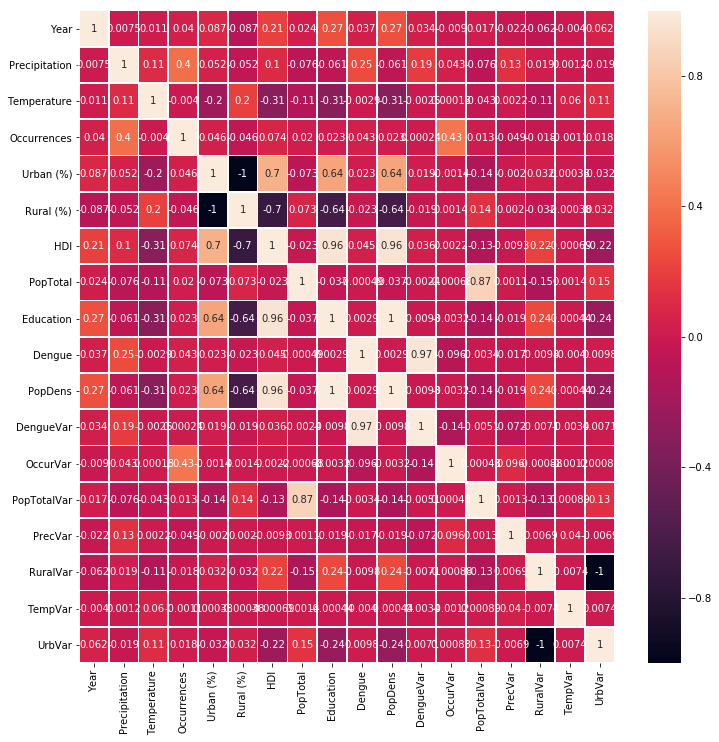

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = data.corr()
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, annot=True, linewidths=.7, ax=ax)

## Self organizing maps